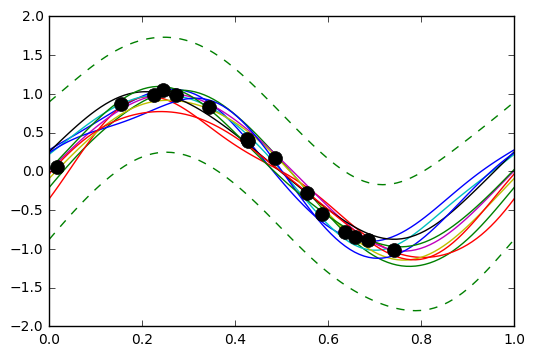

In [55]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

sample_size = 15
X = np.random.uniform(0, 1, (sample_size, 1))
Y = np.sin(3.14*2*X) + np.random.randn(sample_size, 1)*0.05


kernel = GPy.kern.StdPeriodic(input_dim=1, variance=1.)
model = GPy.models.GPRegression(X,Y,kernel, noise_var=0.05)

testX = np.linspace(0, 1, 100).reshape(-1, 1)
posteriorTestY = model.posterior_samples_f(testX, full_cov=True, size=10)
simY, simMse = model.predict(testX)

plt.plot(testX, posteriorTestY)
plt.plot(X, Y, 'ok', markersize=1)
plt.plot(testX, simY - 3 * simMse ** 0.5, '--g')
plt.plot(testX, simY + 3 * simMse ** 0.5, '--g')
plt.show()

In [63]:
import csv
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.svm import SVR
# Metric mean squared error, the lower the better
from sklearn.metrics import mean_squared_error

def read_csv(csv_file):
    '''Returns numpy array and panda version of the file'''
    csv_file = csv_file +".csv"
    df = pd.DataFrame()
    df = df.from_csv(csv_file, header=0, sep=',', index_col=0)
#n=df.shape[0] # number of samples
#d=df.shape[1] # number of features
    array = np.asarray(df,dtype="|S6")
    if np.shape(array)[1] == 1:
        array = array.ravel()
    return array, df

def publish_pred(y_pred, file_name):
    df = pd.DataFrame()
    df = df.from_csv("reg_sample_submission.csv", header=0, sep=',', index_col=0)
    df["Output"] = list(y_pred)
    df.to_csv(file_name)

def minibach(X, y,batch_size): 
    ind = np.random.choice(y.size, size=batch_size, replace=False)
    X_batch, y_batch = X[ind,:], y[ind,:]
    X_batch = preprocessing.scale(X_batch)
    return X_batch, y_batch

tr_in, df_in = read_csv("reg_train_in")
tr_in = np.asarray(tr_in,dtype="float64")
tr_out, df_out = read_csv("reg_train_out")
tr_out = np.asarray(tr_out,dtype="float64").reshape(34200,1)
te_in, df = read_csv("reg_test_in") # Still have to deal with NaNs best

In [102]:
X_tr, y_tr = minibach(tr_in[:,0].reshape(34200,1),tr_in[:,1].reshape(34200,1),1000)
X_tr_scale = preprocessing.StandardScaler().fit(X_tr)
X_train = X_tr_scale.transform(X_tr)
y_train = preprocessing.scale(y_tr)

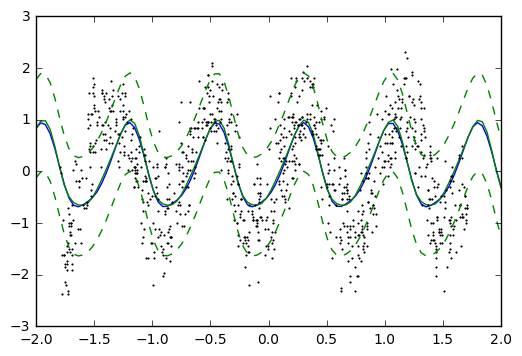

In [103]:
kernel = GPy.kern.StdPeriodic(input_dim=1, variance=1.,period=0.75)
model = GPy.models.GPRegression(X_train,y_train,kernel, noise_var=0.1)

testX = np.linspace(-2, 2, 100).reshape(-1, 1)
posteriorTestY = model.posterior_samples_f(testX, full_cov=True, size=2)
simY, simMse = model.predict(testX)

plt.plot(testX, posteriorTestY)
plt.plot(X_train, y_train, 'ok', markersize=1)
plt.plot(testX, simY - 3 * simMse ** 0.5, '--g')
plt.plot(testX, simY + 3 * simMse ** 0.5, '--g')
plt.show()

### np.mean(X_train)